In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import plotly.express as px
from shapely.geometry import Polygon,Point
import geopandas as geo
import altair as alt
from plotnine import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [5]:
df=pd.read_csv("data/volcanoes around the world in 2021.csv")
df.head()

Region    Number         Volcano Name   Country  Location  Latitude  \
0  West Indies  1600-21-               Piparo  Trinidad  Trinidad    10.000   
1  West Indies  1600-08=   Diables, Morne aux  Dominica  W Indies    15.612   
2  West Indies  1600-09=    Diablotins, Morne  Dominica  W Indies    15.503   
3  West Indies  1600-11=     Plat Pays, Morne  Dominica  W Indies    15.255   
4  West Indies  1600-10=  Trois Pitons, Morne  Dominica  W Indies    15.370   

   Longitude  Elevation (m)           Type       Status Last Known Eruption  
0    -61.000          140.0    Mud volcano   Historical                  D1  
1    -61.430          861.0  Stratovolcano    Fumarolic                   U  
2    -61.397         1430.0  Stratovolcano     Holocene                   U  
3    -61.341          940.0  Stratovolcano  Radiocarbon                  D5  
4    -61.330         1387.0      Lava dome   Historical                  D3

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               1571 non-null   object 
 1   Number               1571 non-null   object 
 2   Volcano Name         1571 non-null   object 
 3   Country              1571 non-null   object 
 4   Location             1571 non-null   object 
 5   Latitude             1571 non-null   float64
 6   Longitude            1571 non-null   float64
 7   Elevation (m)        1566 non-null   float64
 8   Type                 1571 non-null   object 
 9   Status               1571 non-null   object 
 10  Last Known Eruption  1571 non-null   object 
dtypes: float64(3), object(8)
memory usage: 135.1+ KB


In [6]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
  Using cached typing_extensions-4.8.0-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 17.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 8.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━

## Plotting Points
If we want to overlay our data on geographic maps or reproject it into a geographic plot, we can set geo=True, which declares that the data will be plotted in a geographic coordinate system. The default coordinate system is the PlateCarree projection, i.e., raw longitudes and latitudes. If the data is in another coordinate system, you will need to declare an explicit crs as an argument, in which case geo=True is assumed. Once hvPlot knows that your data is in geo coordinates, you can use the tiles option to overlay a the plot on top of map tiles.

In [9]:
import xarray as xr
import hvplot.pandas  # noqa
import hvplot.xarray  # noqa
import cartopy.crs as ccrs
df.hvplot.points('Longitude', 'Latitude', geo=True, color='red', alpha=0.2,
                       xlim=(-200,200), ylim=(-90, 90), tiles='ESRI') #run the notebook to see this satelllite image of volcanoes

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

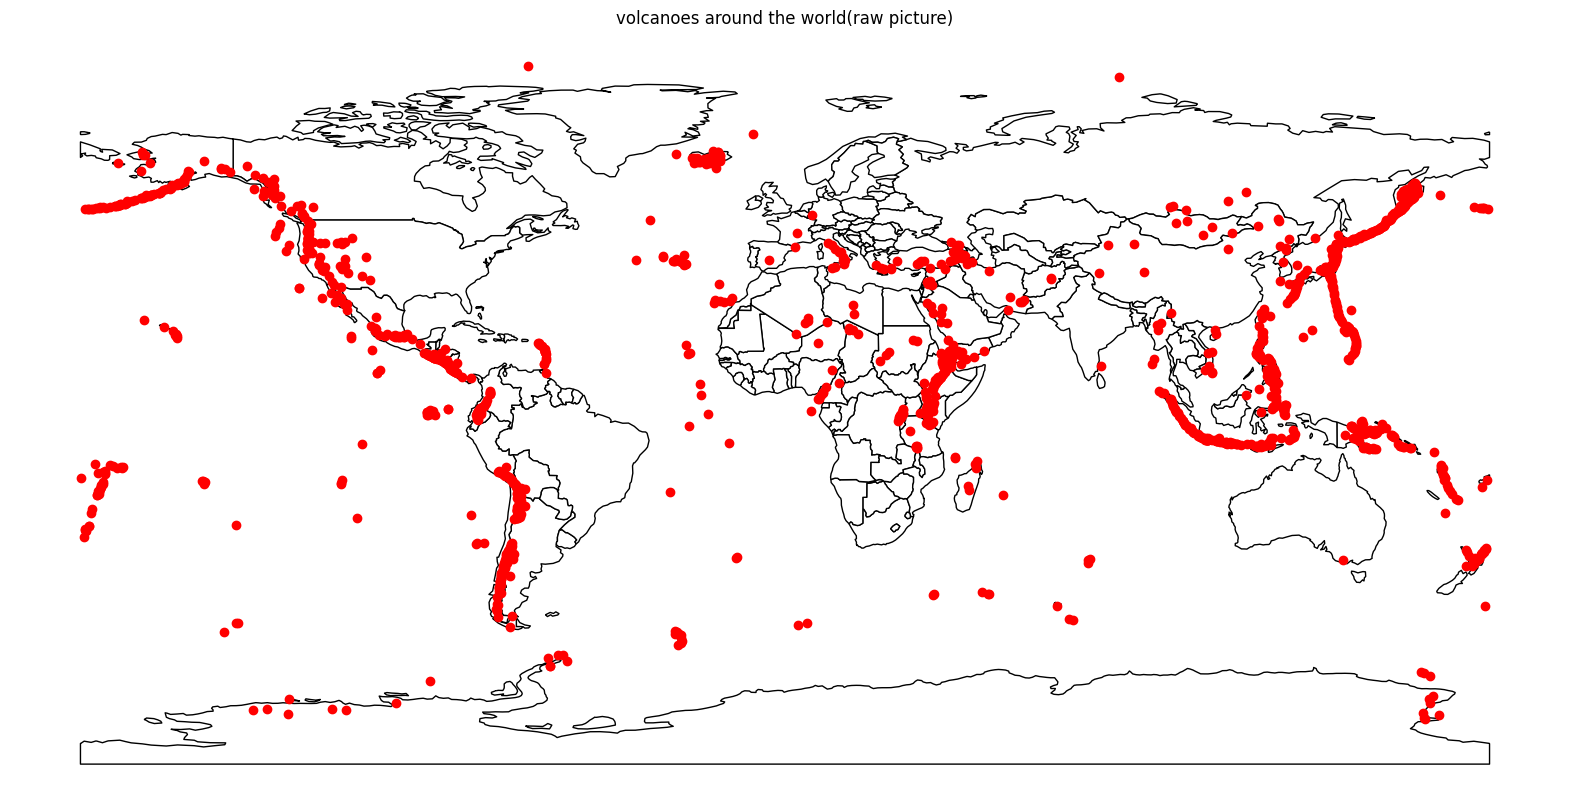

In [10]:
gdf = geo.GeoDataFrame(df,geometry=geo.points_from_xy(df.Longitude,df.Latitude))
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
fig,ax=plt.subplots(figsize=(20,10))
world.plot(color='white', edgecolor='black',ax=ax)
gdf.plot(ax=ax, color='red')
plt.title("volcanoes around the world(raw picture)")
plt.axis("off")
plt.show()

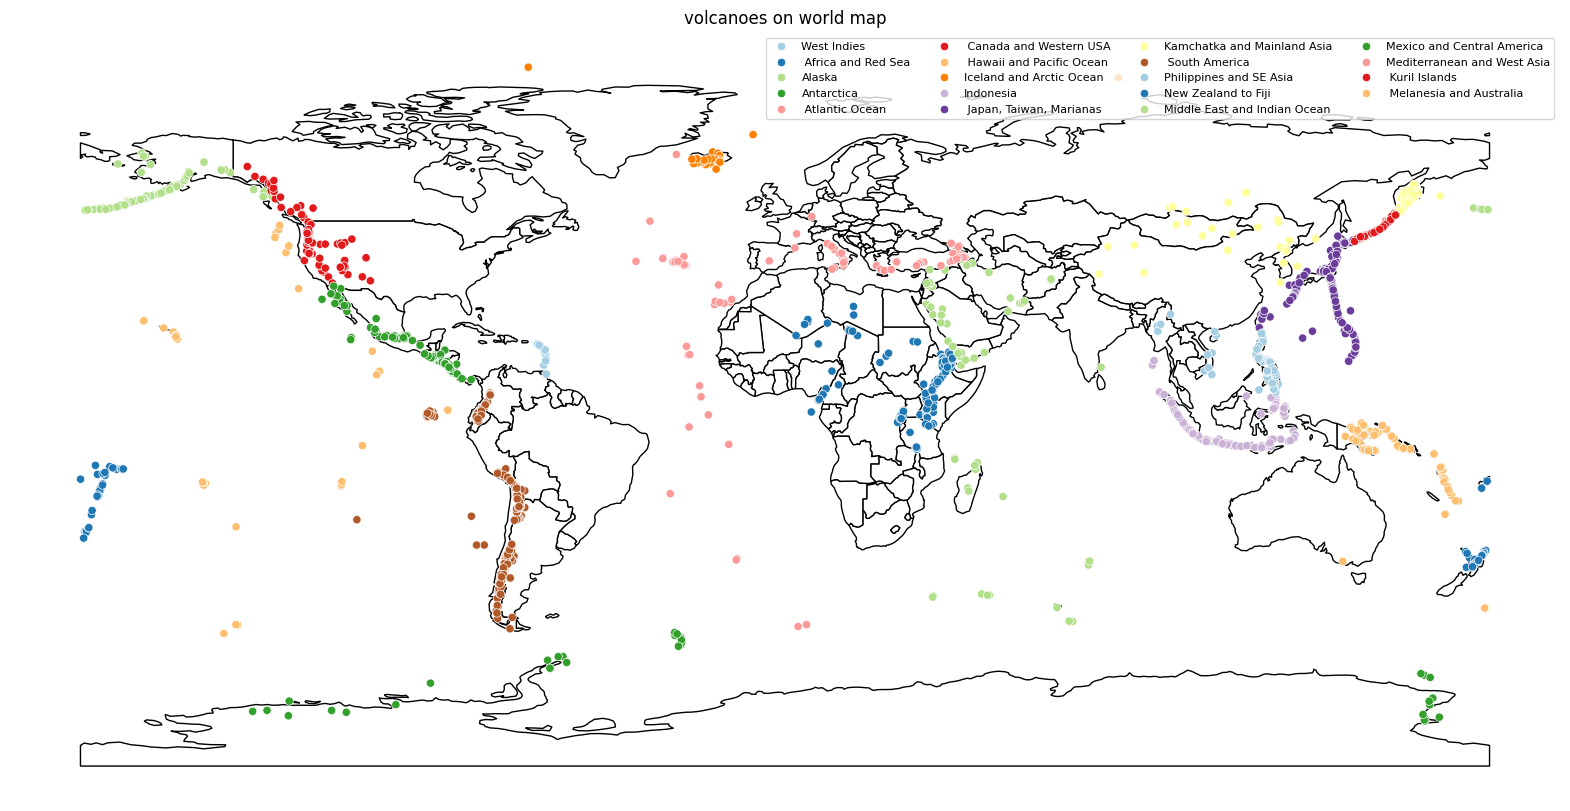

In [12]:
fig,ax=plt.subplots(figsize=(20,10))
world.plot(color='white', edgecolor='black',ax=ax)
sns.scatterplot(x="Longitude",y="Latitude",ax=ax,data=df,hue="Region",palette="Paired")
plt.title("volcanoes on world map")
plt.legend(loc="upper right",fontsize=8,ncol=4)
plt.axis("off")
plt.show()

Elevation (m)
(0, 2000]         900
(2000, 4000]      385
(-2000, 0]        121
(4000, 6000]      107
(-4000, -2000]     28
(-6000, -4000]      5
Name: count, dtype: int64


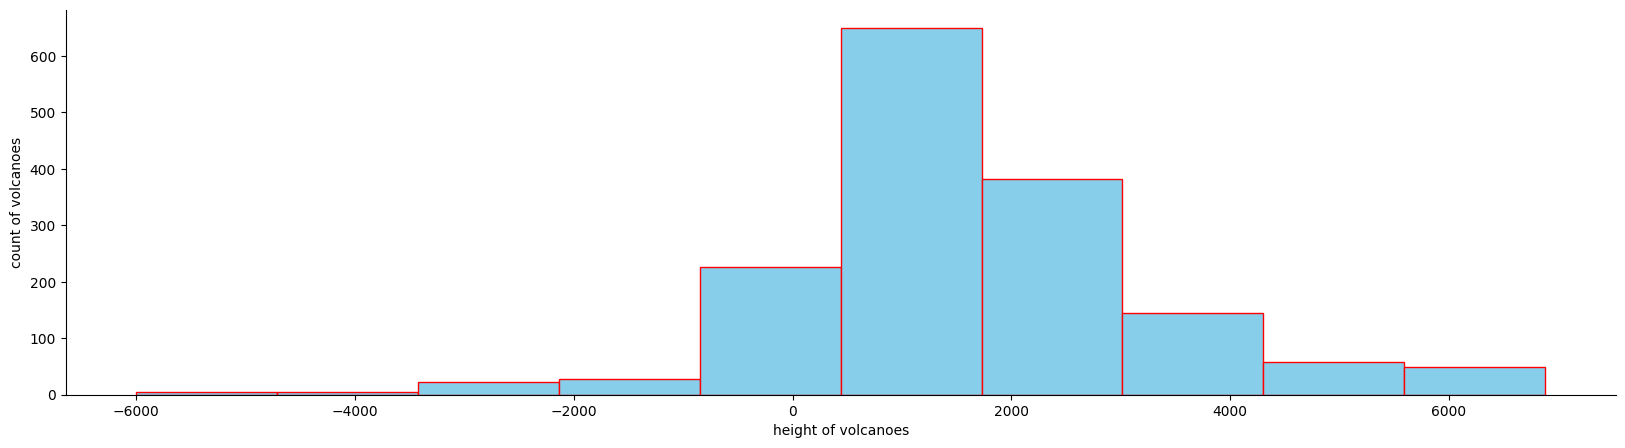

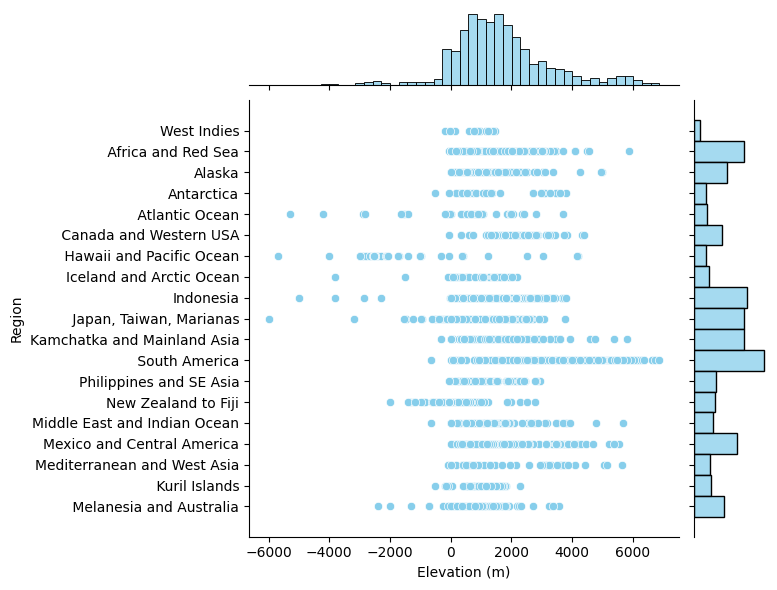

In [13]:
print(pd.cut(df["Elevation (m)"],range(-6000,8000,2000),10).value_counts())
fig,ax=plt.subplots(figsize=(20,5))
df["Elevation (m)"].plot(kind="hist",bins=10,color = "skyblue", ec="red",ax=ax)
sns.despine()
ax.set_ylabel("count of volcanoes")
ax.set_xlabel("height of volcanoes")
sns.jointplot(data=df, x="Elevation (m)", y="Region",color='skyblue')
plt.show()

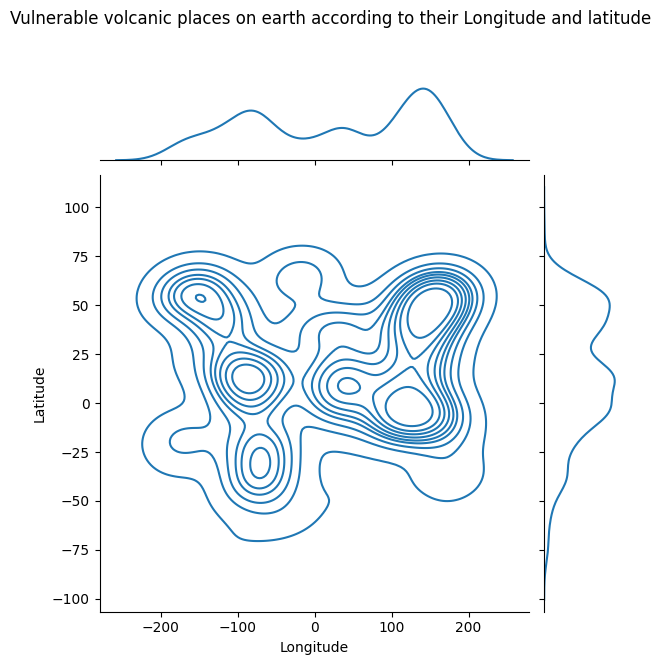

In [14]:
sns.jointplot(data=df, x="Longitude", y="Latitude", kind = "kde");
plt.suptitle("Vulnerable volcanic places on earth according to their Longitude and latitude ",y=1.1)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               1571 non-null   object 
 1   Number               1571 non-null   object 
 2   Volcano Name         1571 non-null   object 
 3   Country              1571 non-null   object 
 4   Location             1571 non-null   object 
 5   Latitude             1571 non-null   float64
 6   Longitude            1571 non-null   float64
 7   Elevation (m)        1566 non-null   float64
 8   Type                 1571 non-null   object 
 9   Status               1571 non-null   object 
 10  Last Known Eruption  1571 non-null   object 
dtypes: float64(3), object(8)
memory usage: 135.1+ KB


In [17]:
source=df.loc[:,["Latitude","Longitude","Last Known Eruption","Elevation (m)"]]
source["elevation type"]=["on land" if i>=0 else "in water" for i in source["Elevation (m)"] ]
alt.Chart(source).mark_rect().encode(
    alt.X('Longitude:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('Latitude:Q', bin=alt.Bin(maxbins=40)),
    alt.Color('Elevation (m):Q', scale=alt.Scale(scheme='greenblue',domain=[-3000, 7000]))
)

alt.Chart(...)

PlotnineError: "Cannot deal with these labels: {'fontweight'}"

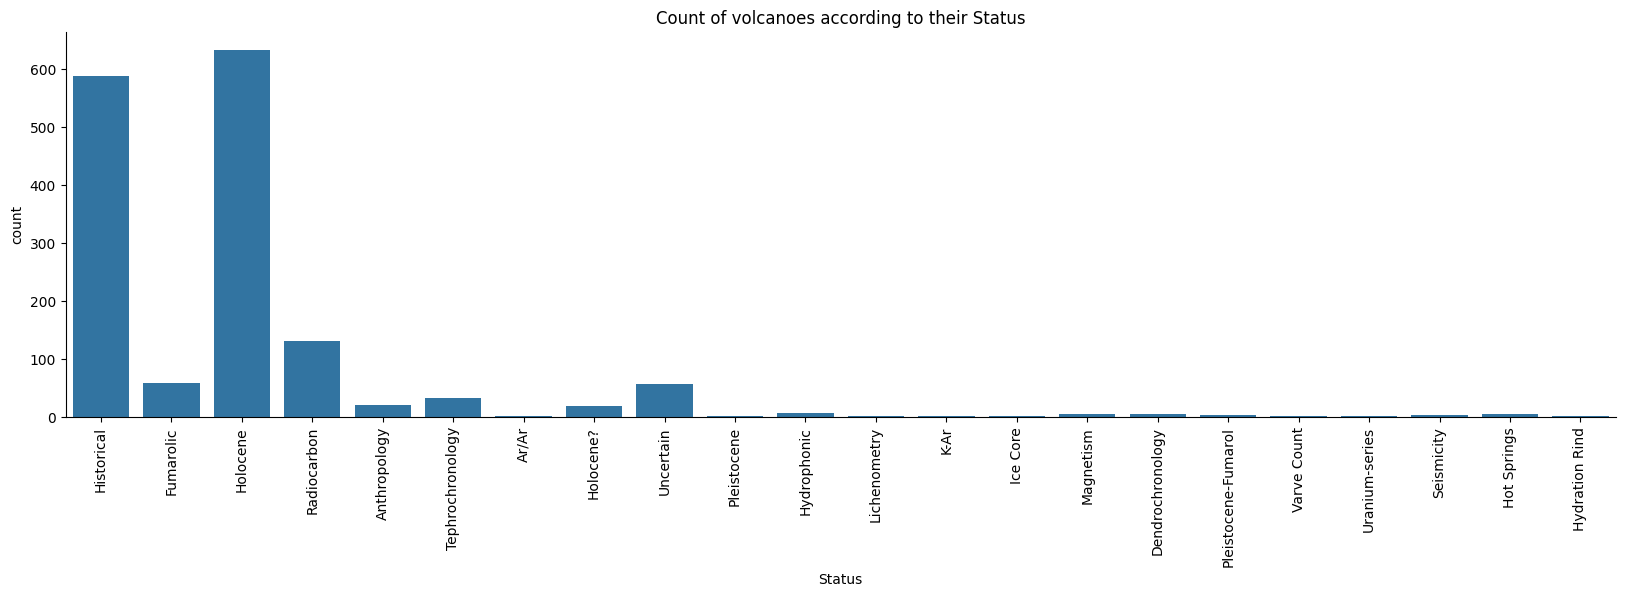

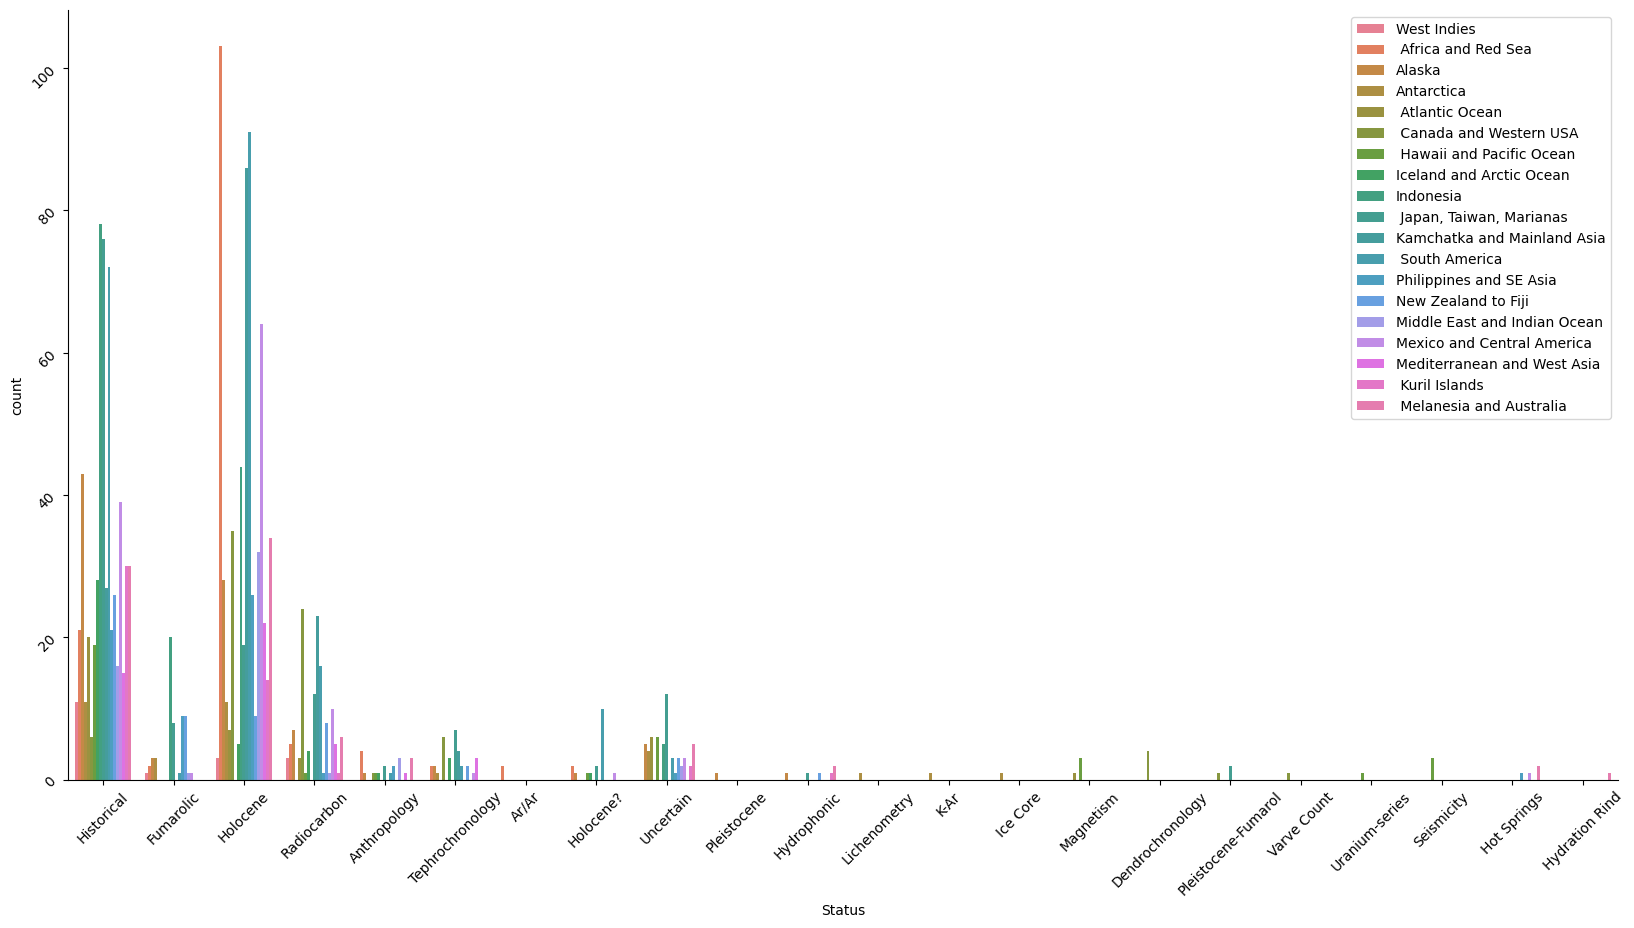

In [18]:
df1=df.loc[:,["Region","Elevation (m)","Status"]]
df1=df1.groupby(["Region","Status"])["Elevation (m)"].mean().reset_index()
df1["Elevation (m)"]=[int(i) for i in df1["Elevation (m)"]]
plt.subplots(figsize=(20,5))
sns.countplot(x="Status",data=df)
plt.title("Count of volcanoes according to their Status")
plt.xticks(rotation=90)
sns.despine()
plt.figure(figsize=(20,10))
sns.countplot(x="Status",data=df,hue="Region")
plt.legend(loc="upper right")
sns.despine()
plt.tick_params(labelrotation=45)
text_color = np.array(['black']*len(df1))
text_color[df1['Elevation (m)']<0] = 'white'
(ggplot(df1, aes('factor(Region)', 'Status', fill='Elevation (m)'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='Elevation (m)'), size=10, color=text_color)
 + labs(title="Avg. Height of Volcanoes (According to Status)",fontweight='bold', size=10, color="Black")
 + theme(panel_background=element_rect(fill=None, alpha=.2),figure_size=(20, 20),text=element_text(size=8))
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
)

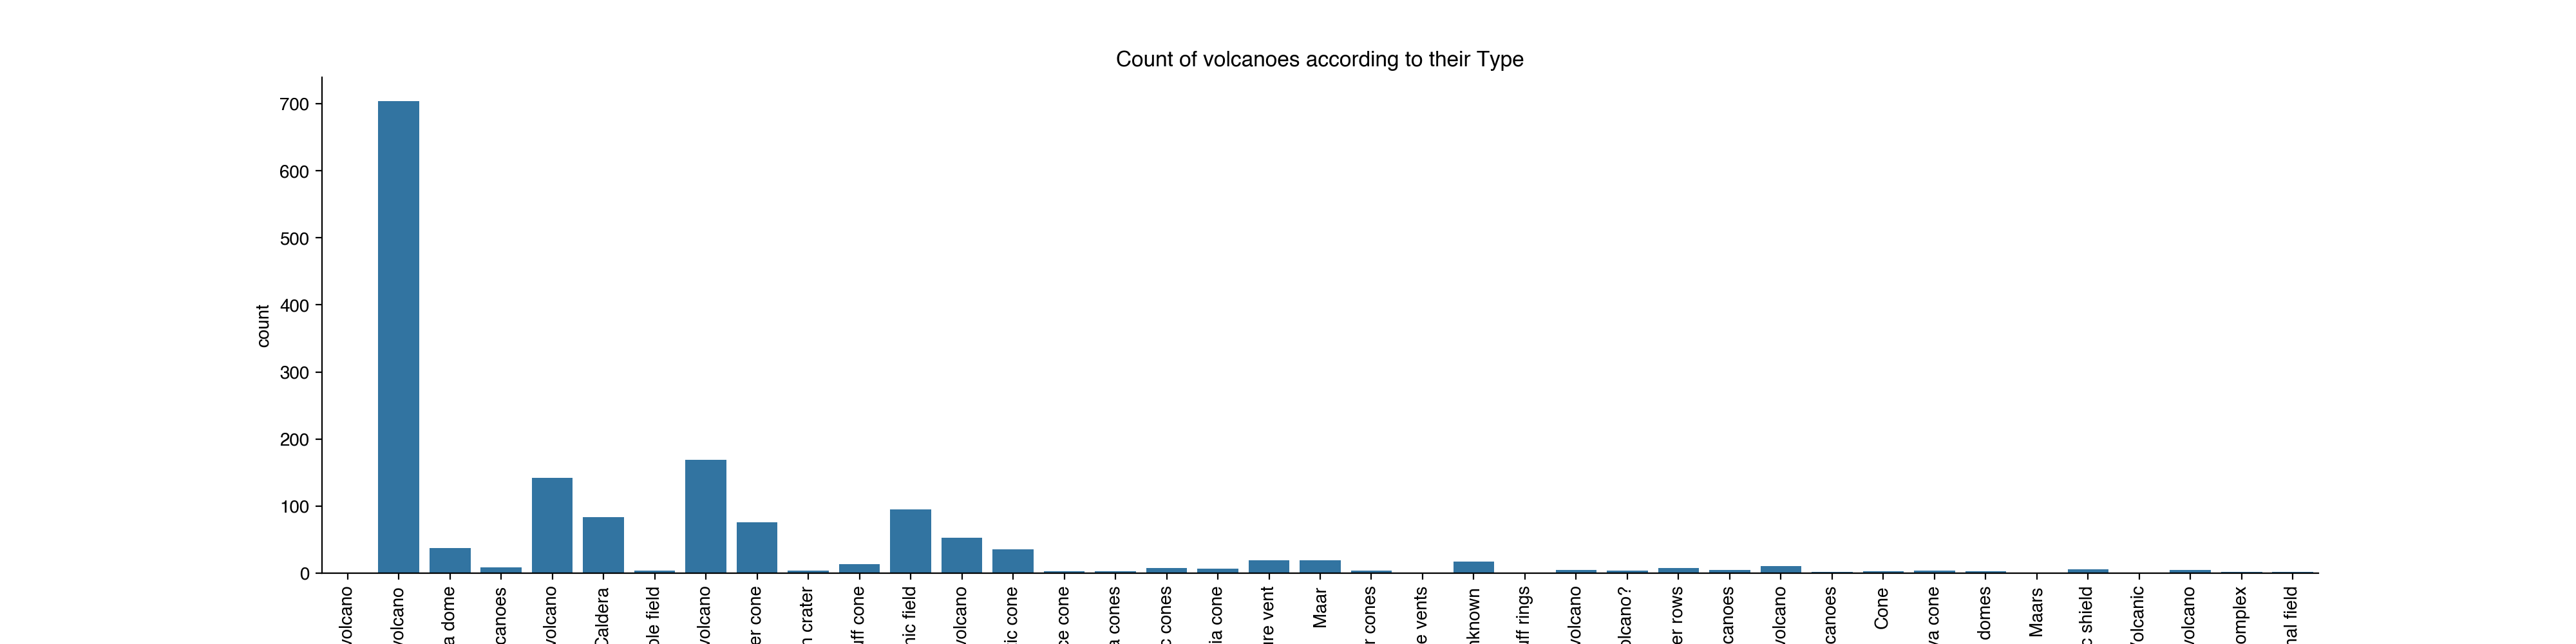

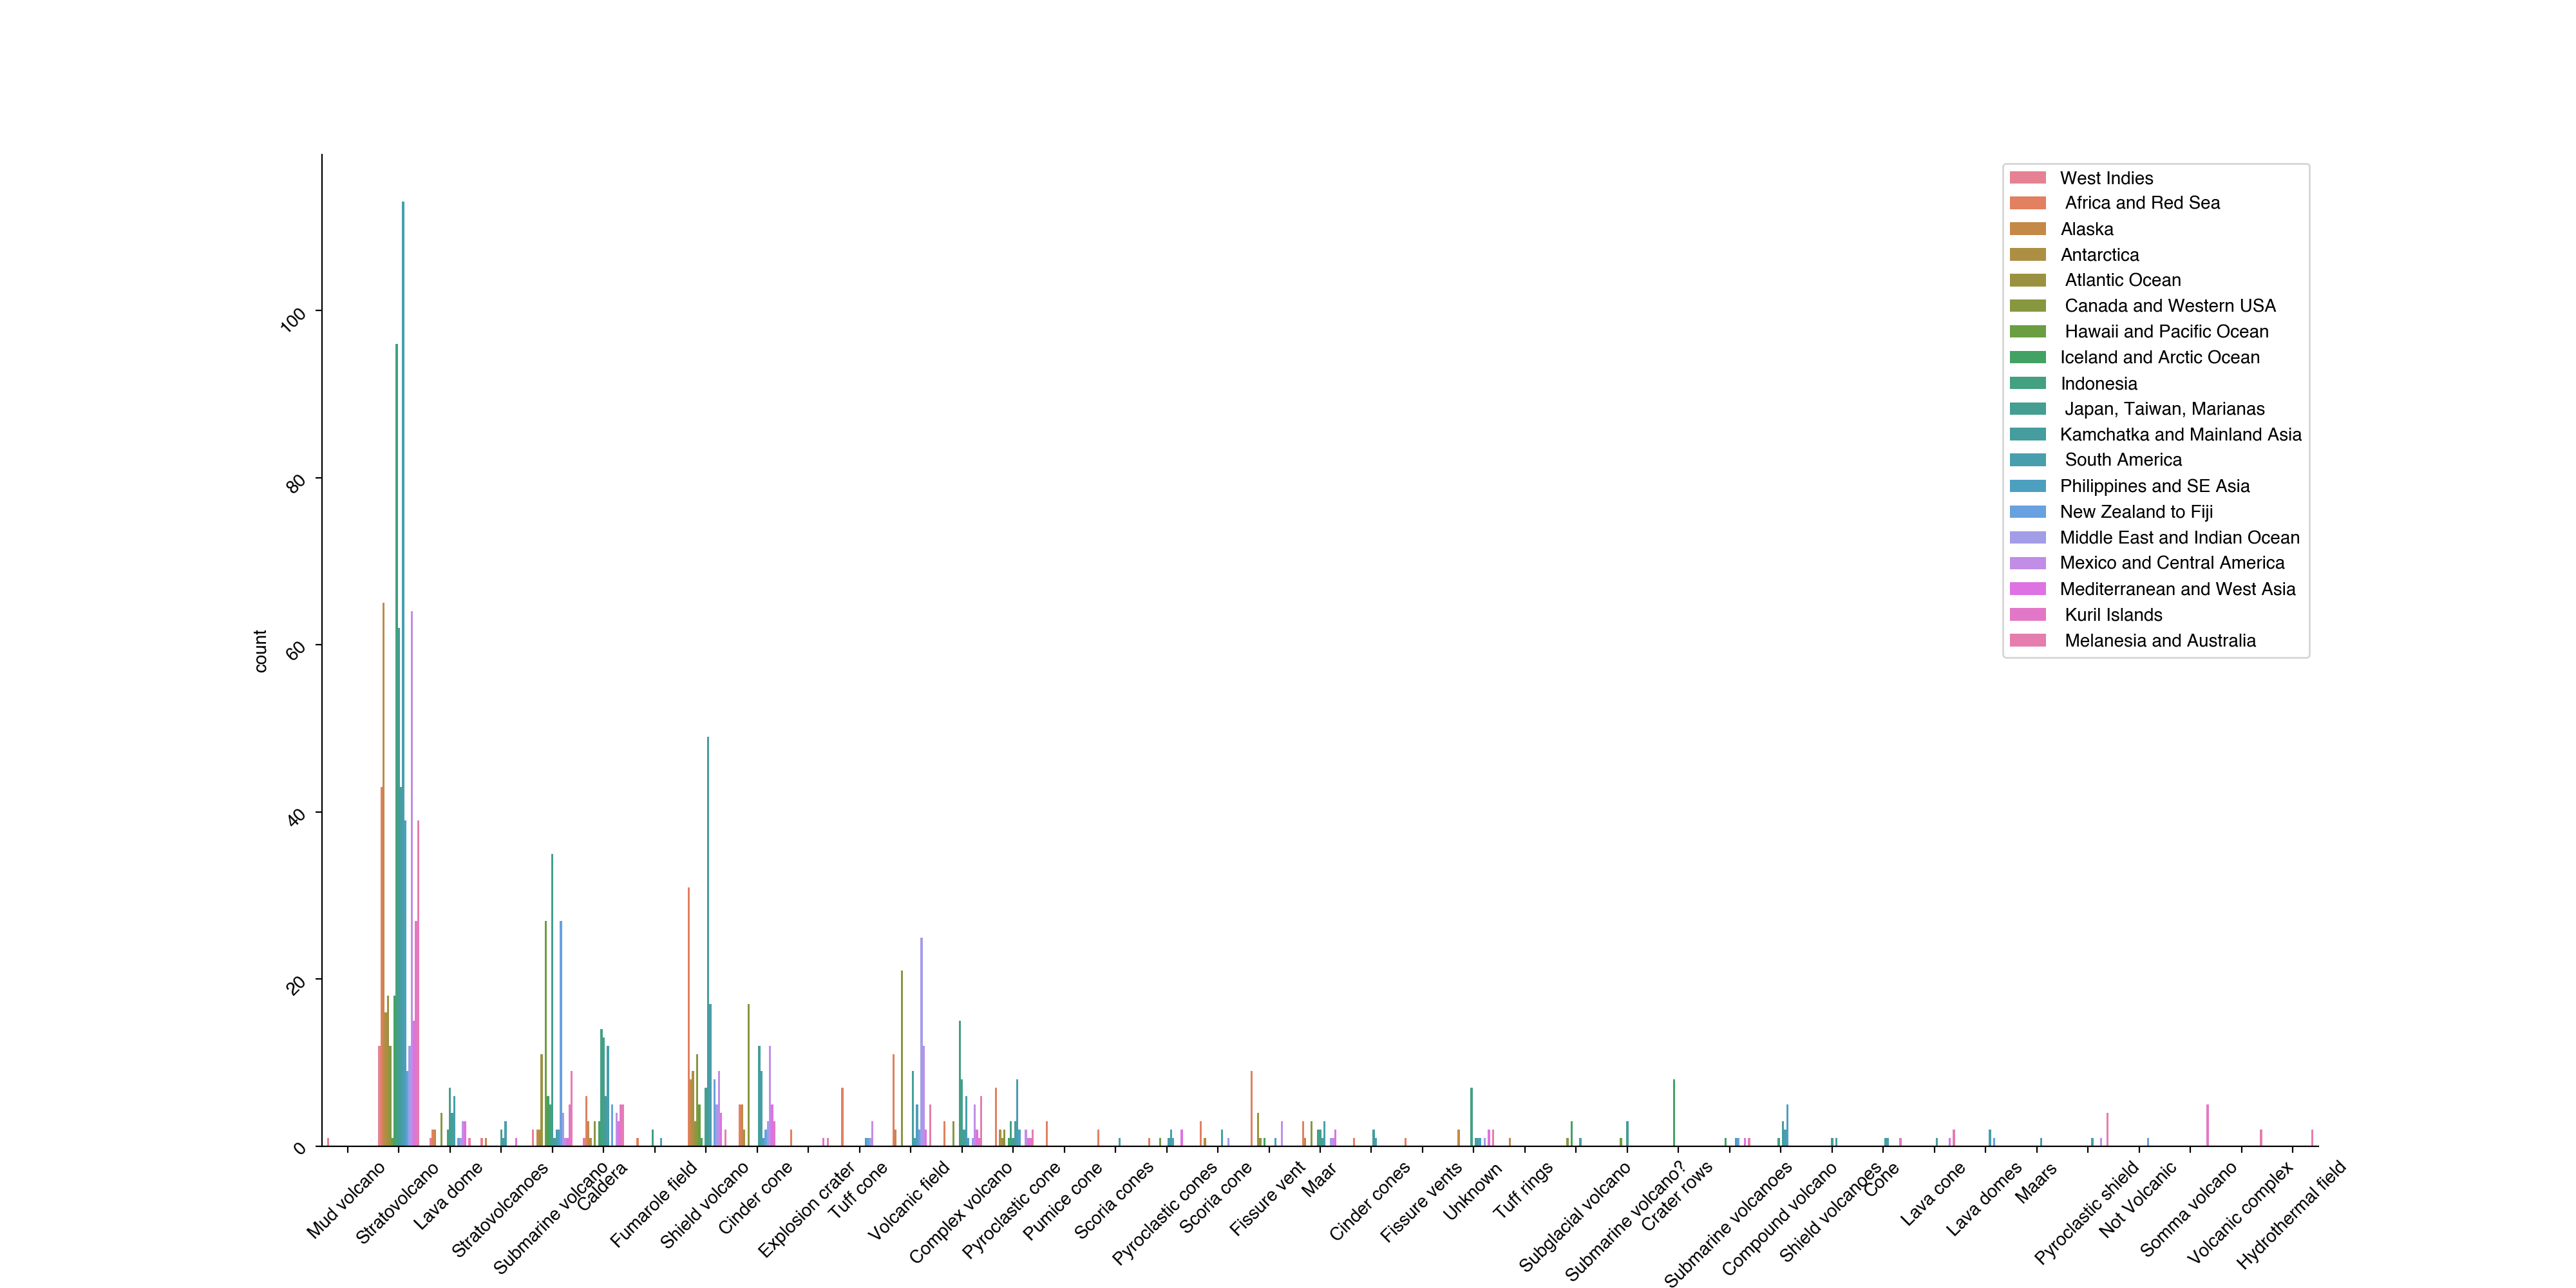

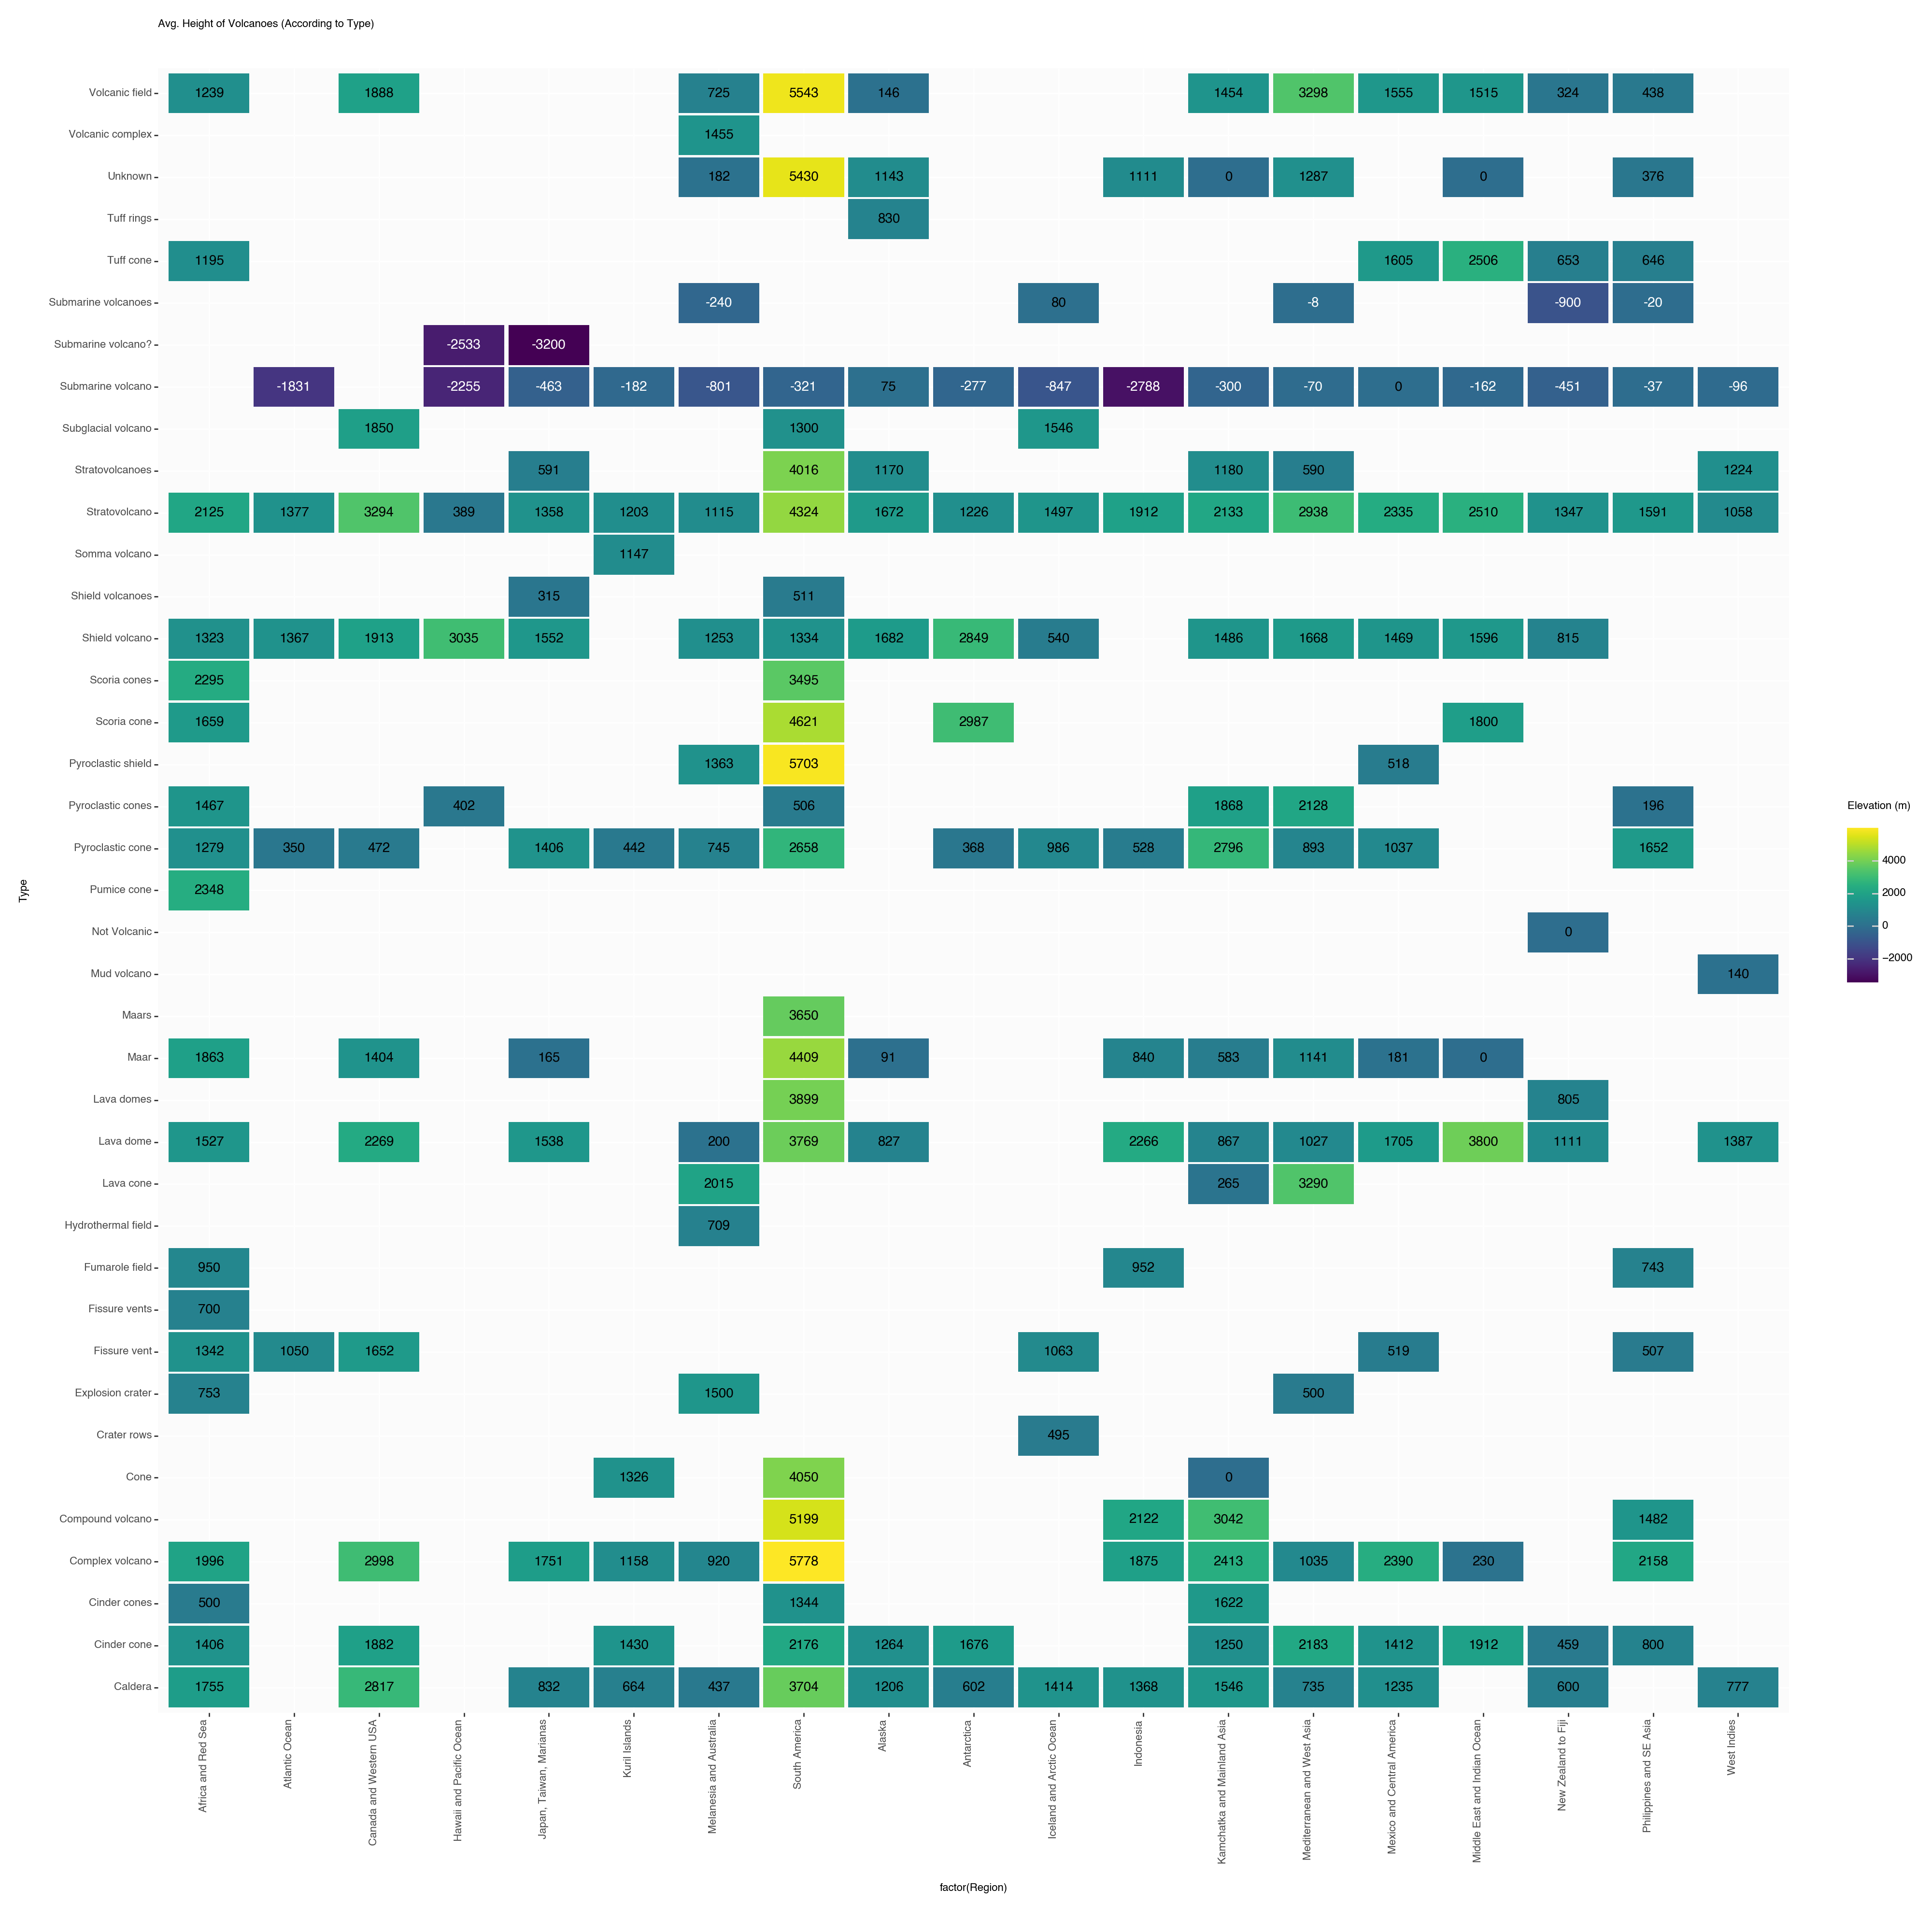

<Figure Size: (2000 x 2000)>

In [20]:
df1=df.loc[:,["Region","Elevation (m)","Type"]]
df1=df1.groupby(["Region","Type"])["Elevation (m)"].mean().reset_index()
df1["Elevation (m)"]=[int(i) for i in df1["Elevation (m)"]]
plt.subplots(figsize=(20,5))
sns.countplot(x="Type",data=df)
plt.title("Count of volcanoes according to their Type")
plt.xticks(rotation=90)
sns.despine()
plt.figure(figsize=(20,10))
sns.countplot(x="Type",data=df,hue="Region")
plt.legend(loc="upper right")
sns.despine()
plt.tick_params(labelrotation=45)
text_color = np.array(['black']*len(df1))
text_color[df1['Elevation (m)']<0] = 'white'
(ggplot(df1, aes('factor(Region)', 'Type', fill='Elevation (m)'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='Elevation (m)'), size=10, color=text_color)
 + labs(title="Avg. Height of Volcanoes (According to Type)", size=10, color="Black")
 + theme(panel_background=element_rect(fill=None, alpha=.2),figure_size=(20, 20),text=element_text(size=8))
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
)

In [21]:
df_new=df.dropna().sort_values(by=["Elevation (m)"],ascending=False)[["Volcano Name","Elevation (m)"]]
df_new1=df_new.head(50)
df_new2=df_new.tail(50)
dataf=pd.concat([df_new1,df_new2]).reset_index().drop(columns=["index"])
alt.Chart(dataf).mark_bar().encode(
    x="Volcano Name",
    y="Elevation (m)",
    color=alt.condition(
        alt.datum["Elevation (m)"] > 0,
        alt.value("bisque"),  # The positive color
        alt.value("aqua")  # The negative color
    ),
    tooltip=['Volcano Name', 'Elevation (m)']
).properties(width=1150,title='Top 50 volcanoes above Earth and top 50 in Sea ').interactive()

alt.Chart(...)

In [22]:
alt.Chart(df[["Region","Last Known Eruption"]].value_counts().reset_index().rename(columns={0:"count"})).mark_circle().encode(
    x='Region',
    y='Last Known Eruption',
    size='count:Q',
    tooltip=["Last Known Eruption", 'Region',"count"]
).properties(width=1000,title='Count as per their Region and Last Known Eruption type in US').interactive()

alt.Chart(...)

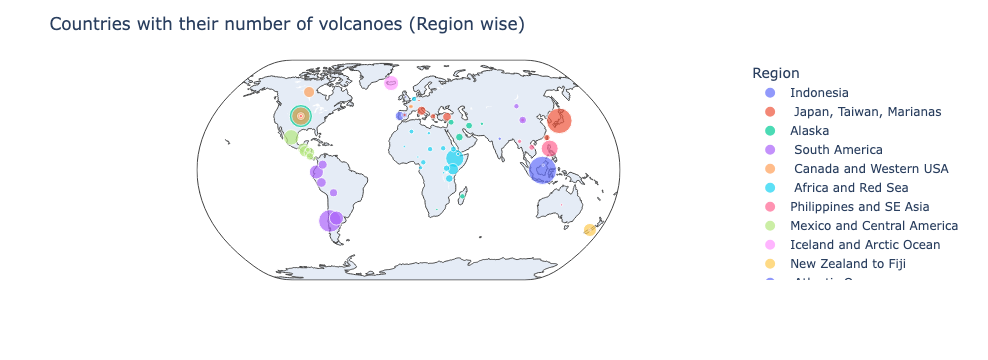

In [32]:
merge_1=px.data.gapminder()[["country","iso_alpha"]].rename(columns={"country":"Country"}).drop_duplicates()
df2=df.merge(merge_1,on="Country")
new_data=df2.loc[:,["Country","Region","iso_alpha"]].value_counts().to_frame().reset_index()
new_data.head()
fig = px.scatter_geo(new_data, locations="iso_alpha", color="Region",
                     hover_name="Country", size="count",#0:means count of volcanoes
                     projection="natural earth")
fig.update_layout(
        title_text = 'Countries with their number of volcanoes (Region wise)',
    )

fig.show()# need to add deleted country improve it later

In [33]:
scale = alt.Scale(domain=["in water","on land"],
                  range=['#e7ba52', '#a7a7a7'])
color = alt.Color('elevation type:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('Longitude:T', title='Longitude',scale=alt.Scale(domain=[-200, 200])),
    alt.Y('Latitude:Q',
        title='Latitude',
        scale=alt.Scale(domain=[-100, 100])
    ),
    color=alt.condition(brush, color, alt.value('lightgray')),
    size=alt.Size('Elevation (m):Q', scale=alt.Scale(range=[-3000, 7000]))
).properties(
    width=800,
    height=500
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='elevation type:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=1000,
).add_selection(
    click
).interactive()

alt.vconcat(
    points,
    bars,
    data=source,
    title=" Volcanoes above the earth or below as per their Elevation (m)"
)

alt.VConcatChart(...)

In [34]:
pts = alt.selection(type="single", encodings=['x'])

rect = alt.Chart(source).mark_rect().encode(
    alt.X('Longitude:Q', bin=True),
    alt.Y('Latitude:Q', bin=True),
    alt.Color('Elevation (m)',
        scale=alt.Scale(scheme='redblue'),
        legend=alt.Legend(title='Height or depth')
    )
)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Count of volcanoes')
    )
).transform_filter(
    pts
)

bar = alt.Chart(source).mark_bar().encode(
    x='Last Known Eruption:N',
    y='count()',
    color=alt.condition(pts, alt.ColorValue("lightsalmon"), alt.ColorValue("grey"))
).properties(
    width=550,
    height=200
).add_selection(pts)

alt.vconcat(
    rect + circ,
    bar,
    title=" Volcanoes according to their height and Last Known eruption"
).resolve_legend(
    color="independent",
    size="independent"
)


alt.VConcatChart(...)

        Region    Number         Volcano Name   Country  Location  Latitude  \
0  West Indies  1600-21-               Piparo  Trinidad  Trinidad    10.000   
1  West Indies  1600-08=   Diables, Morne aux  Dominica  W Indies    15.612   
2  West Indies  1600-09=    Diablotins, Morne  Dominica  W Indies    15.503   
3  West Indies  1600-11=     Plat Pays, Morne  Dominica  W Indies    15.255   
4  West Indies  1600-10=  Trois Pitons, Morne  Dominica  W Indies    15.370   

   Longitude  Elevation (m)           Type       Status Last Known Eruption  \
0    -61.000          140.0    Mud volcano   Historical                  D1   
1    -61.430          861.0  Stratovolcano    Fumarolic                   U   
2    -61.397         1430.0  Stratovolcano     Holocene                   U   
3    -61.341          940.0  Stratovolcano  Radiocarbon                  D5   
4    -61.330         1387.0      Lava dome   Historical                  D3   

  elevation type  
0        on land  
1        on 

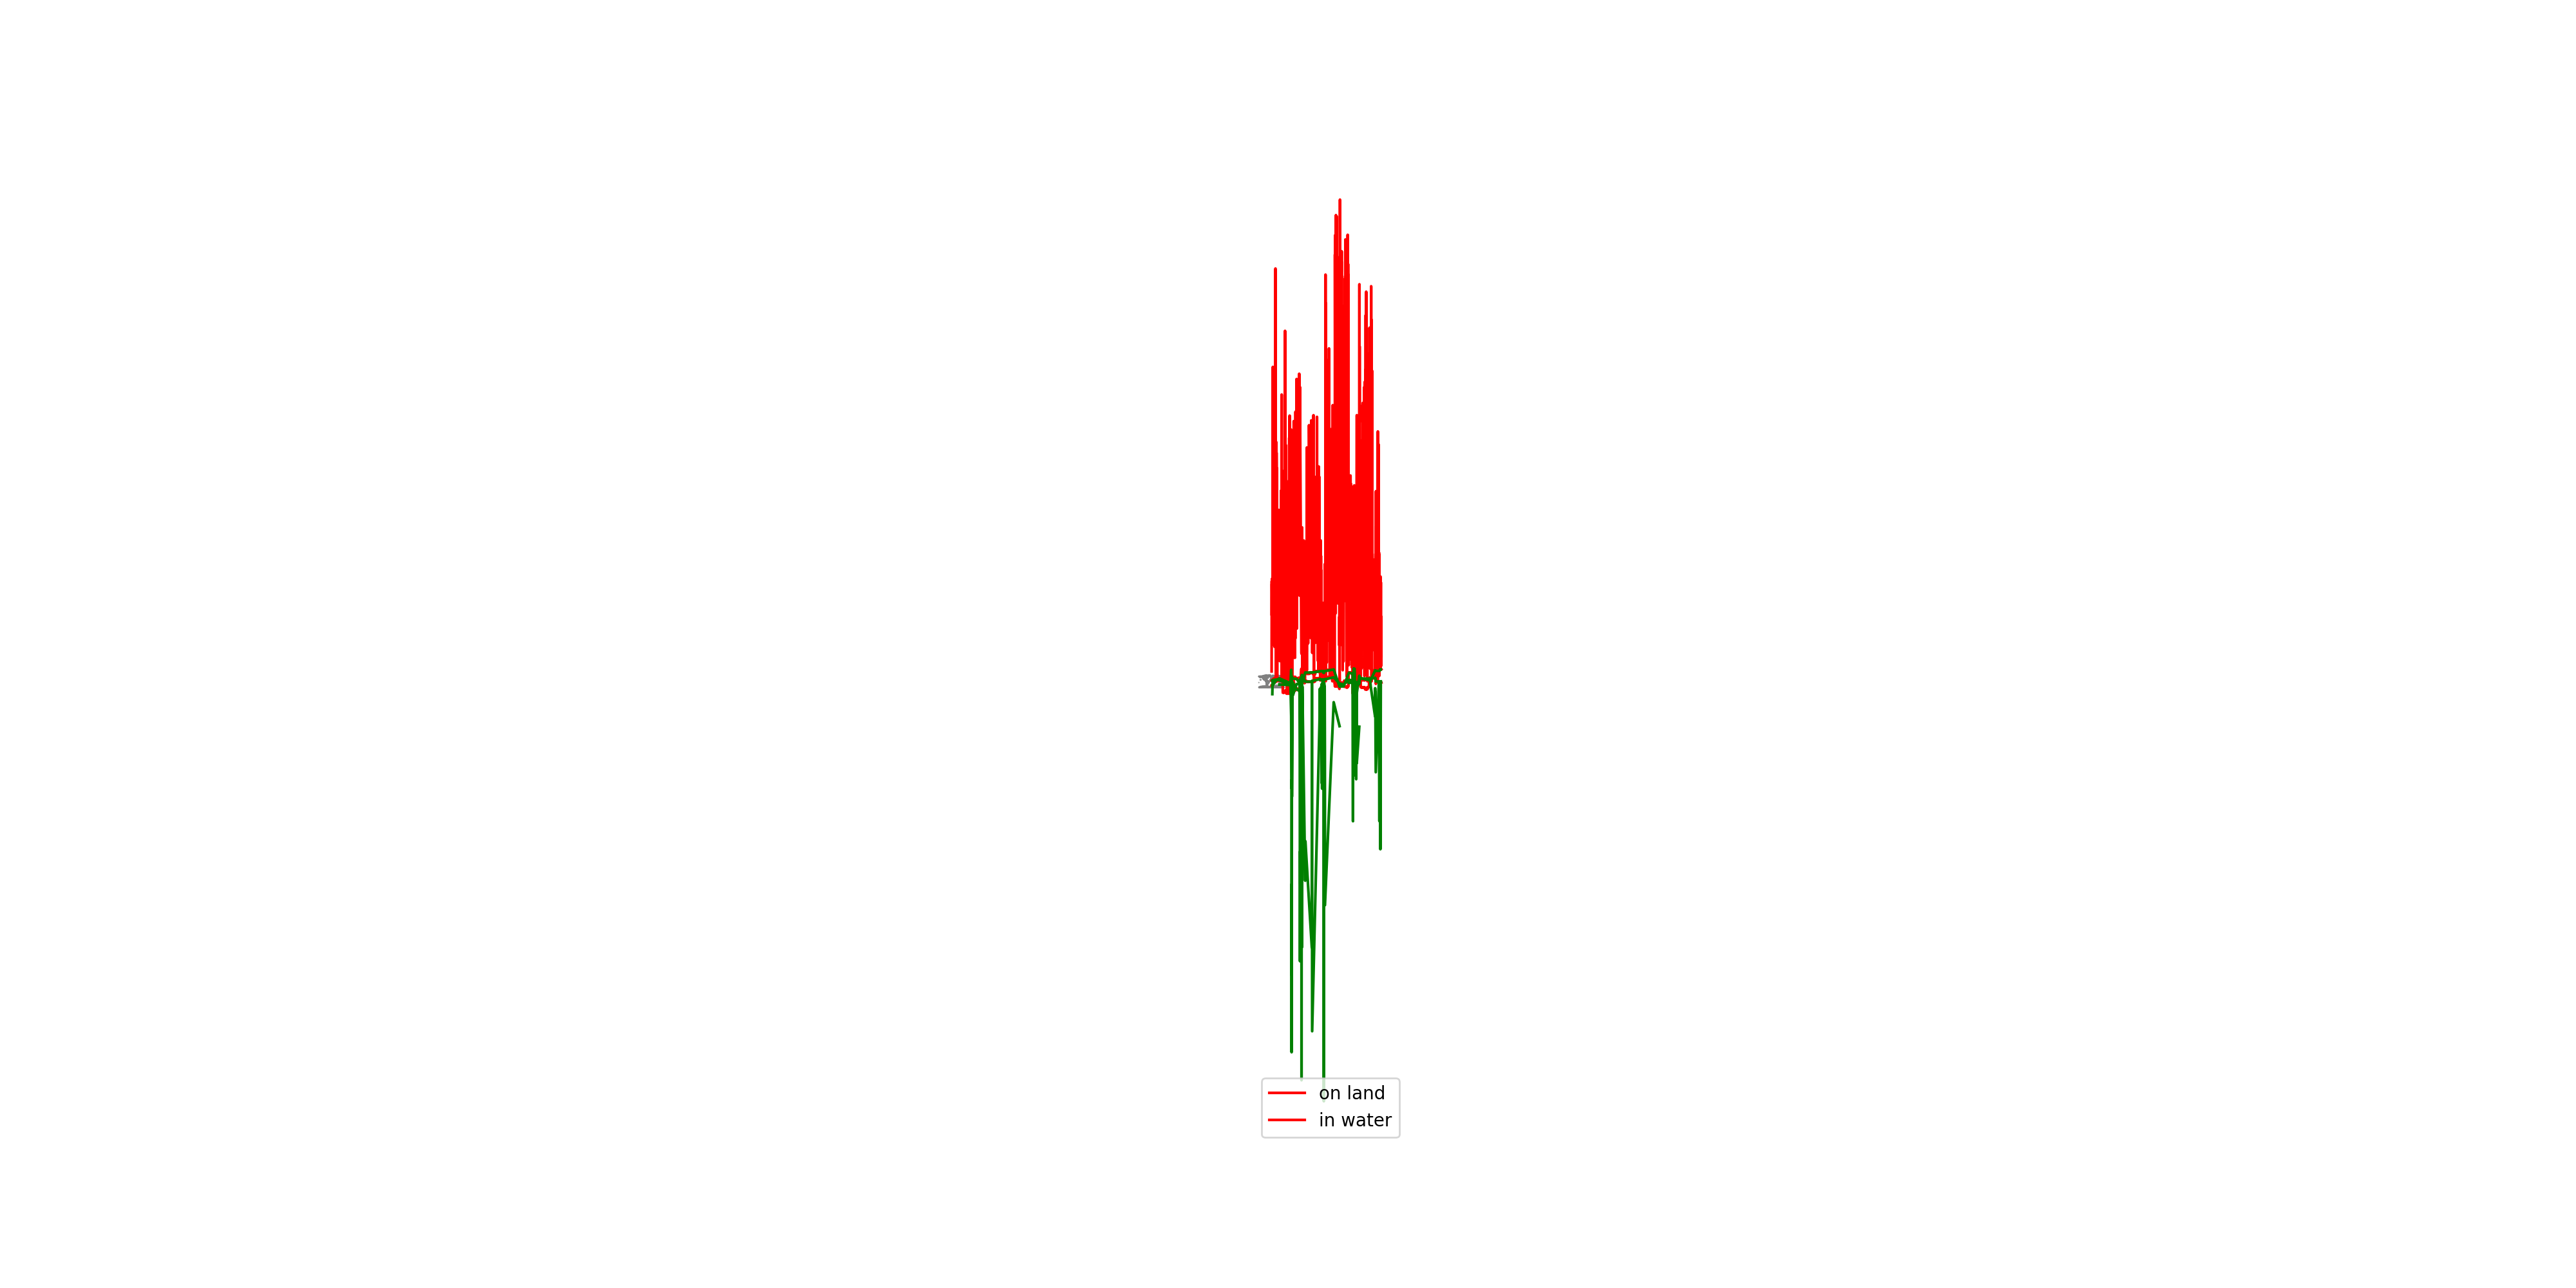

In [41]:


df["elevation type"]=["on land" if i>=0 else "in water" for i in df["Elevation (m)"]]
df_onland=df[df["elevation type"]=="on land"]
print(df.head())
df_inwater=df[df["elevation type"]=="in water"]
fig,ax=plt.subplots(figsize=(20,10))
world.plot(color='skyblue', edgecolor='grey',ax=ax)
df_onland.plot(ax=ax, color='red')
df_inwater.plot(ax=ax, color='green')
plt.axis("off");
plt.legend(["on land","in water"]);
plt.show()